In [1]:
import numpy as np

def average_np(n):
    s = np.random.random(n)
    return s.mean()


In [4]:
n = 10000000
%time average_np(n)

CPU times: user 110 ms, sys: 29.8 ms, total: 140 ms
Wall time: 143 ms


0.4999772299571052

In [6]:
def is_prime(I):
    if I % 2 == 0: return False
    for i in range(3, int(I ** 0.5) + 1, 2):
        if I % i == 0: return False
    return True

In [7]:
n = int(1e8 + 3)

In [8]:
n

100000003

In [9]:
%time is_prime(n)

CPU times: user 30 µs, sys: 0 ns, total: 30 µs
Wall time: 33.1 µs


False

In [10]:
def fib_rec_py1(n):
    if n < 2:
        return n
    else:
        return fib_rec_py1(n - 1) + fib_rec_py1(n - 2)

In [12]:
%time fib_rec_py1(4)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 7.87 µs


3

In [15]:
from functools import lru_cache as cache

@cache(maxsize=None)
def fib_rec_py2(n):
    if n < 2:
        return n
    else:
        return fib_rec_py2(n - 1) + fib_rec_py2(n - 2)

In [16]:
%time fib_rec_py2(35)

CPU times: user 36 µs, sys: 6 µs, total: 42 µs
Wall time: 46.3 µs


9227465

In [17]:
def fib_it_py(n):
    x, y = 0, 1
    for i in range(1, n + 1):
        x, y = y, x + y
    return x

In [19]:
%time fib_it_py(80)

CPU times: user 17 µs, sys: 0 ns, total: 17 µs
Wall time: 21 µs


23416728348467685

In [21]:
import random
import numpy as np
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [23]:
rn = [(random.random() * 2 - 1, random.random() * 2 - 1) for _ in range(500)]
rn = np.array(rn)
rn[:5]

array([[-0.53554961, -0.350063  ],
       [-0.55185709,  0.49029118],
       [ 0.08573521, -0.14959653],
       [-0.95133021,  0.70202735],
       [-0.12474   , -0.61937098]])

(-1.1, 1.1)

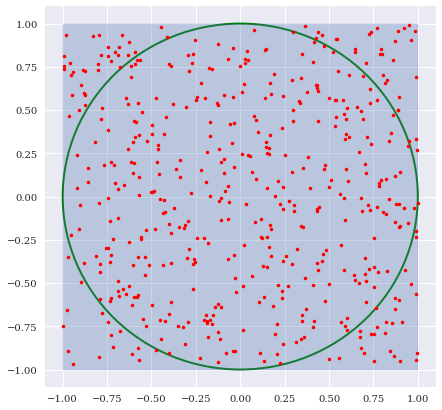

In [24]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
circ = plt.Circle((0,0), radius=1, edgecolor='g', lw=2.0, facecolor='None')
box = plt.Rectangle((-1,-1), 2, 2, edgecolor='b', alpha=0.3)
ax.add_patch(circ)
ax.add_patch(box)
plt.plot(rn[:,0], rn[:,1], 'r.')
plt.ylim(-1.1, 1.1)
plt.xlim(-1.1, 1.1)


In [25]:
import math
S0 = 36.
T = 1.0
r = 0.06
sigma = 0.2
def simulate_tree(M):
    dt = T / M
    u = math.exp(sigma * math.sqrt(dt))
    d = 1 / u
    S = np.zeros((M + 1, M + 1))
    S[0, 0] = S0
    z = 1
    for t in range(1, M + 1):
        for i in range(z):
            S[i, t] = S[i, t-1] * u
            S[i+1, t] = S[i, t-1] * d
        z += 1
    return S
    

np.set_printoptions(formatter={'float': lambda x: '%6.2f' % x})
simulate_tree(4)

array([[ 36.00,  39.79,  43.97,  48.59,  53.71],
       [  0.00,  32.57,  36.00,  39.79,  43.97],
       [  0.00,   0.00,  29.47,  32.57,  36.00],
       [  0.00,   0.00,   0.00,  26.67,  29.47],
       [  0.00,   0.00,   0.00,   0.00,  24.13]])

In [26]:
M = 100
I = 50000
def mcs_simulation_py(p):
    M, I = p
    dt = T / M
    S = np.zeros((M + 1, I))
    S[0] = S0
    rn = np.random.standard_normal(S.shape)
    for t in range (1, M + 1):
        for i in range(I):
            S[t, i] = S[t-1, i] * math.exp((r - sigma ** 2 / 2) * dt + rn[t, i])
    return S

%time S = mcs_simulation_py((M, I))


CPU times: user 4.59 s, sys: 33.5 ms, total: 4.62 s
Wall time: 4.64 s


In [27]:
S

array([[ 36.00,  36.00,  36.00, ...,  36.00,  36.00,  36.00],
       [ 24.71,  22.97,  57.07, ...,  16.27,  12.36,   2.30],
       [  8.94,  30.46,  96.74, ...,  56.90,   8.96,   1.06],
       ...,
       [2853246.97, 76609.57,   0.52, ..., 239961.41, 1397607.25,   0.00],
       [2507064.26, 92751.28,   0.44, ..., 42552.31, 1036663.79,   0.00],
       [1524513.50, 63491.00,   0.14, ..., 9606.46, 854911.91,   0.00]])

In [28]:
S[-1].mean()

1.3831127278190642e+16